# Train Dataset

In [1]:
import pandas as pd


data = pd.read_csv('./train.csv')
titanic_dataset = data
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 891
Number of attributes = 12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
for col in data.columns:
    print(col)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [4]:
import numpy as np

data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 891
Number of attributes = 12
Number of missing values:
	PassengerId: 0
	Survived: 0
	Pclass: 0
	Name: 0
	Sex: 0
	Age: 177
	SibSp: 0
	Parch: 0
	Ticket: 0
	Fare: 0
	Cabin: 687
	Embarked: 2


In [5]:
# these are easy, to get the minimum:
print('Age min = {}'.format(data['Age'].min()))
# now, you do the rest:
print('Age max = {}'.format(data['Age'].max()))




#print('mean = {}'.format(df['Price'].mean()))
#print('median = {}'.format(df['Price'].median()))
#print('Standard deviation = {}'.format(df['Price'].std()))

Age min = 0.42
Age max = 80.0


In [6]:
data['Sex'].value_counts()


male      577
female    314
Name: Sex, dtype: int64

In [7]:
data['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
data['Fare'].describe()


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

## Class Survival Rate

### In Numbers

In [9]:
data['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [10]:
(data.loc[data['Sex'] == 'female']['Survived']).value_counts() 

1    233
0     81
Name: Survived, dtype: int64

In [11]:
(data.loc[data['Sex'] == 'male']['Survived']).value_counts() 

0    468
1    109
Name: Survived, dtype: int64

In [12]:
(data.loc[data['Pclass'] == 1 ]['Survived']).value_counts() 

1    136
0     80
Name: Survived, dtype: int64

In [13]:
(data.loc[data['Pclass'] == 2 ]['Survived']).value_counts() 

0    97
1    87
Name: Survived, dtype: int64

In [14]:
(data.loc[data['Pclass'] == 3 ]['Survived']).value_counts() 

0    372
1    119
Name: Survived, dtype: int64

In [15]:
(data.loc[ (data['Pclass'] == 3) & (data['Sex'] == 'male') ]['Survived']).value_counts() 

0    300
1     47
Name: Survived, dtype: int64

In [16]:
(data.loc[ (data['Pclass'] == 3) & (data['Sex'] == 'female') ]['Survived']).value_counts() 

1    72
0    72
Name: Survived, dtype: int64

In [17]:
(data.loc[ (data['Pclass'] == 2) & (data['Sex'] == 'male') ]['Survived']).value_counts() 

0    91
1    17
Name: Survived, dtype: int64

In [18]:
(data.loc[ (data['Pclass'] == 2) & (data['Sex'] == 'female') ]['Survived']).value_counts() 

1    70
0     6
Name: Survived, dtype: int64

In [19]:
(data.loc[ (data['Pclass'] == 1) & (data['Sex'] == 'male') ]['Survived']).value_counts() 

0    77
1    45
Name: Survived, dtype: int64

In [20]:
(data.loc[ (data['Pclass'] == 1) & (data['Sex'] == 'female') ]['Survived']).value_counts() 

1    91
0     3
Name: Survived, dtype: int64

### Visualisation

In [21]:
%config InlineBackend.figure_formats = set(['retina'])

import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

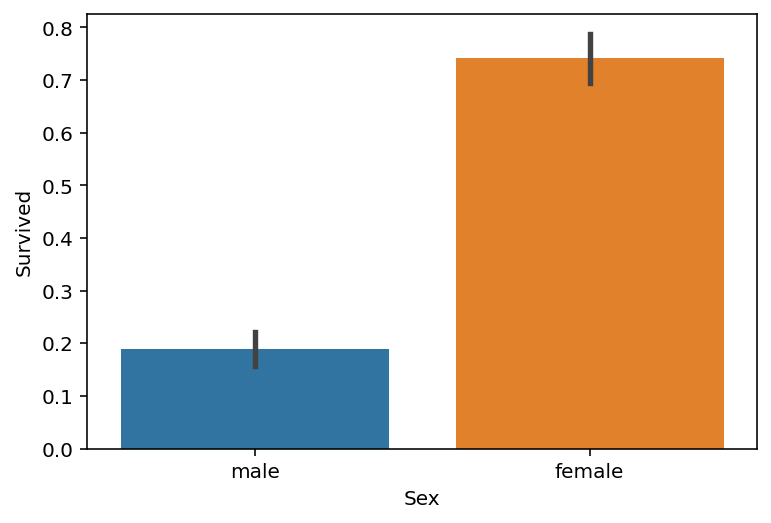

In [22]:
sns.barplot(x = "Sex", y ="Survived", data = titanic_dataset)


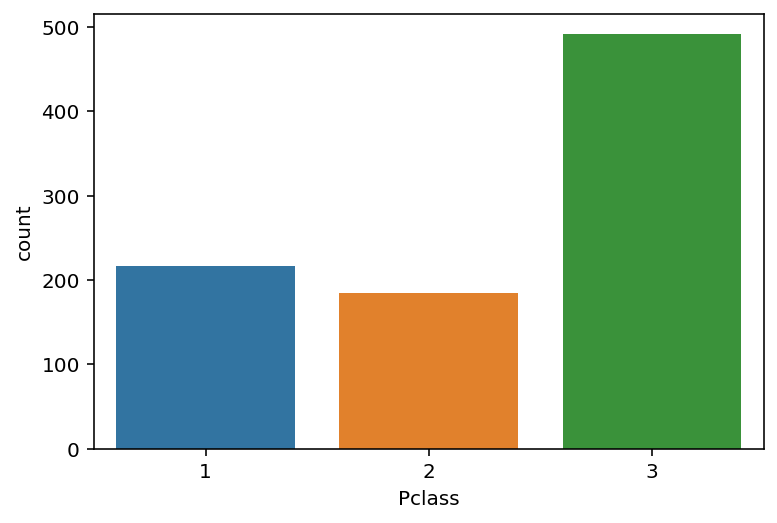

In [23]:
ax = sns.countplot(x="Pclass", data=titanic_dataset)


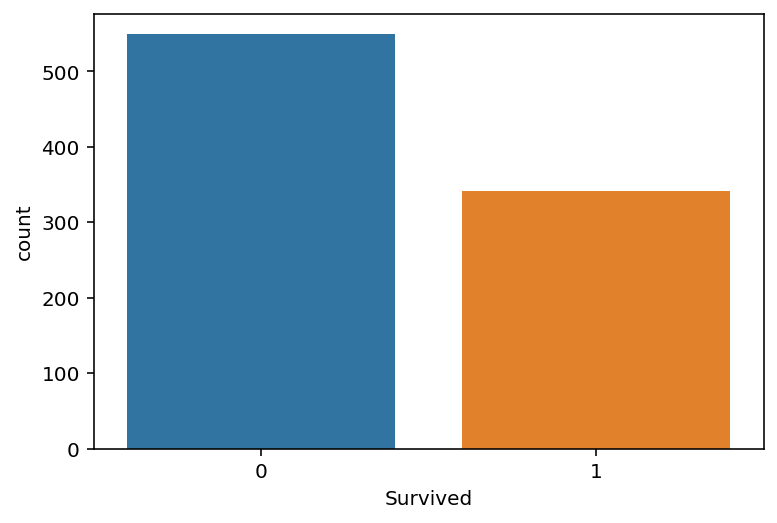

In [24]:
ax = sns.countplot(x="Survived", data=titanic_dataset)


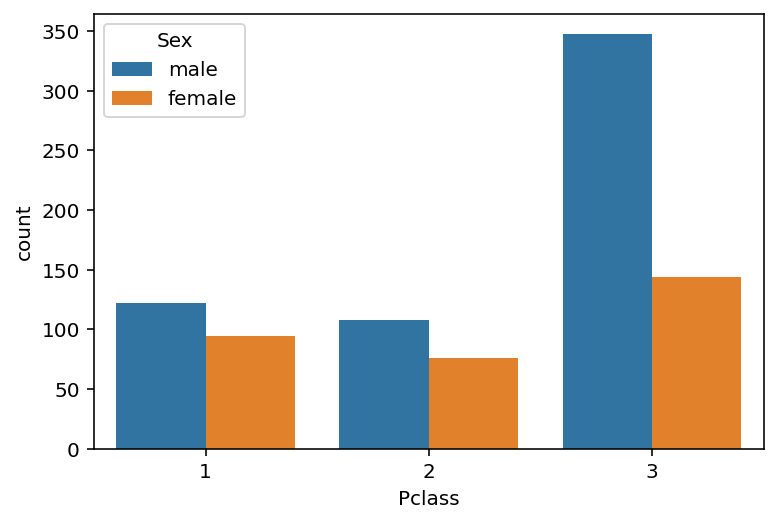

In [25]:
ax = sns.countplot(x="Pclass",hue="Sex", data=titanic_dataset)


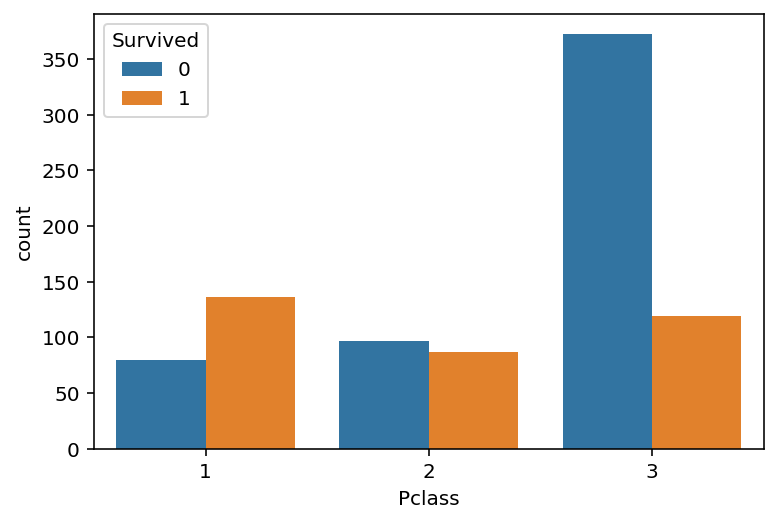

In [26]:
ax = sns.countplot(x="Pclass", hue="Survived", data=titanic_dataset)

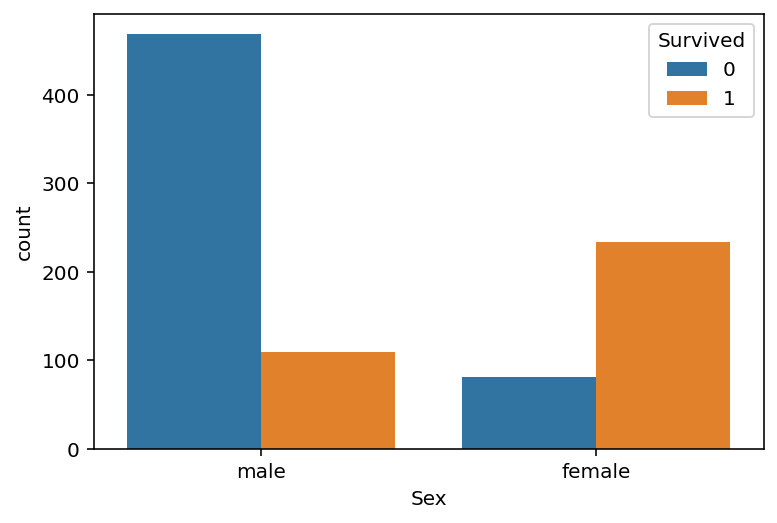

In [27]:
ax = sns.countplot(x="Sex", hue="Survived", data=titanic_dataset)

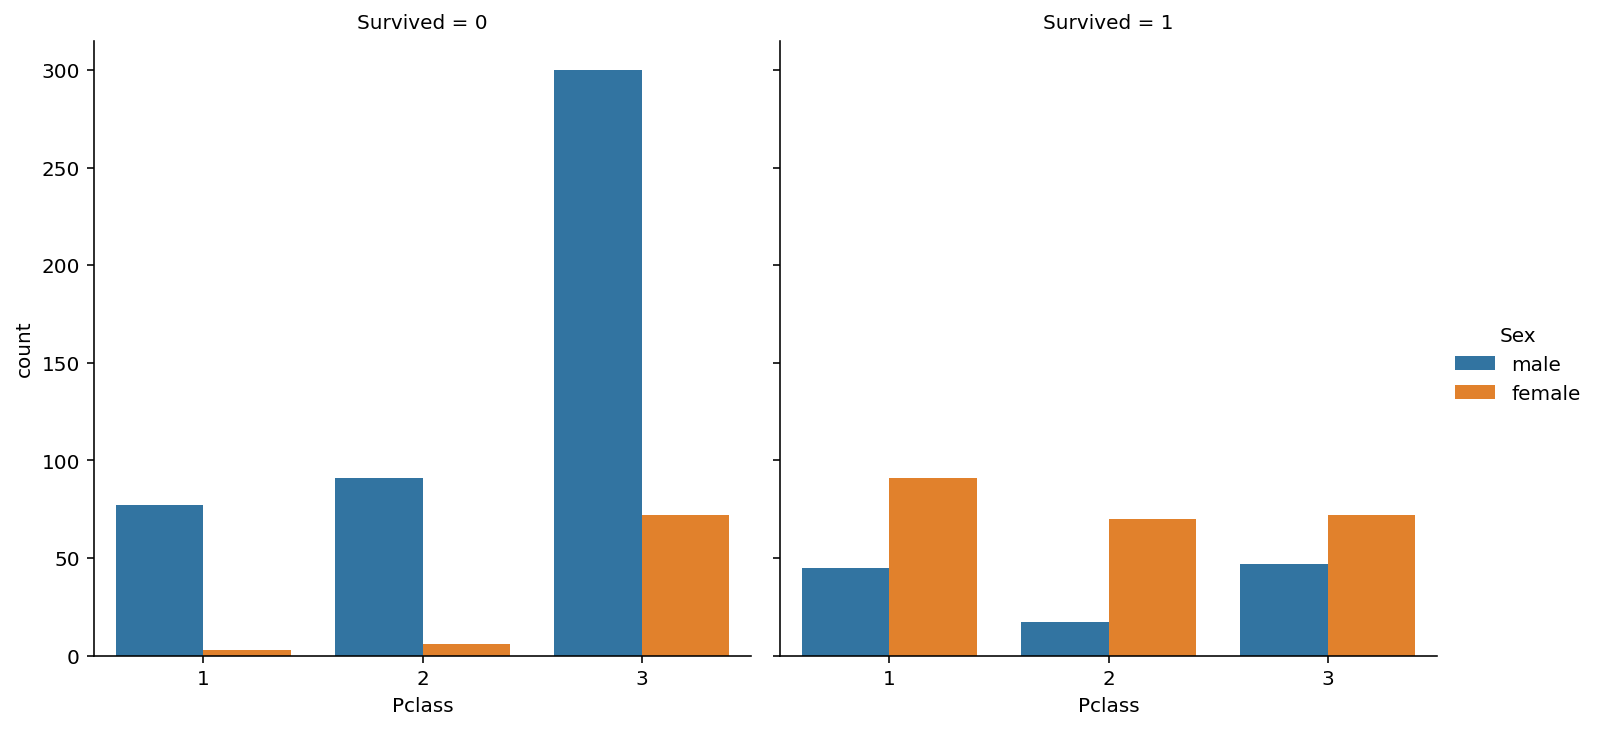

In [28]:
sns.catplot(x="Pclass", hue="Sex", col="Survived", kind="count", data=titanic_dataset);

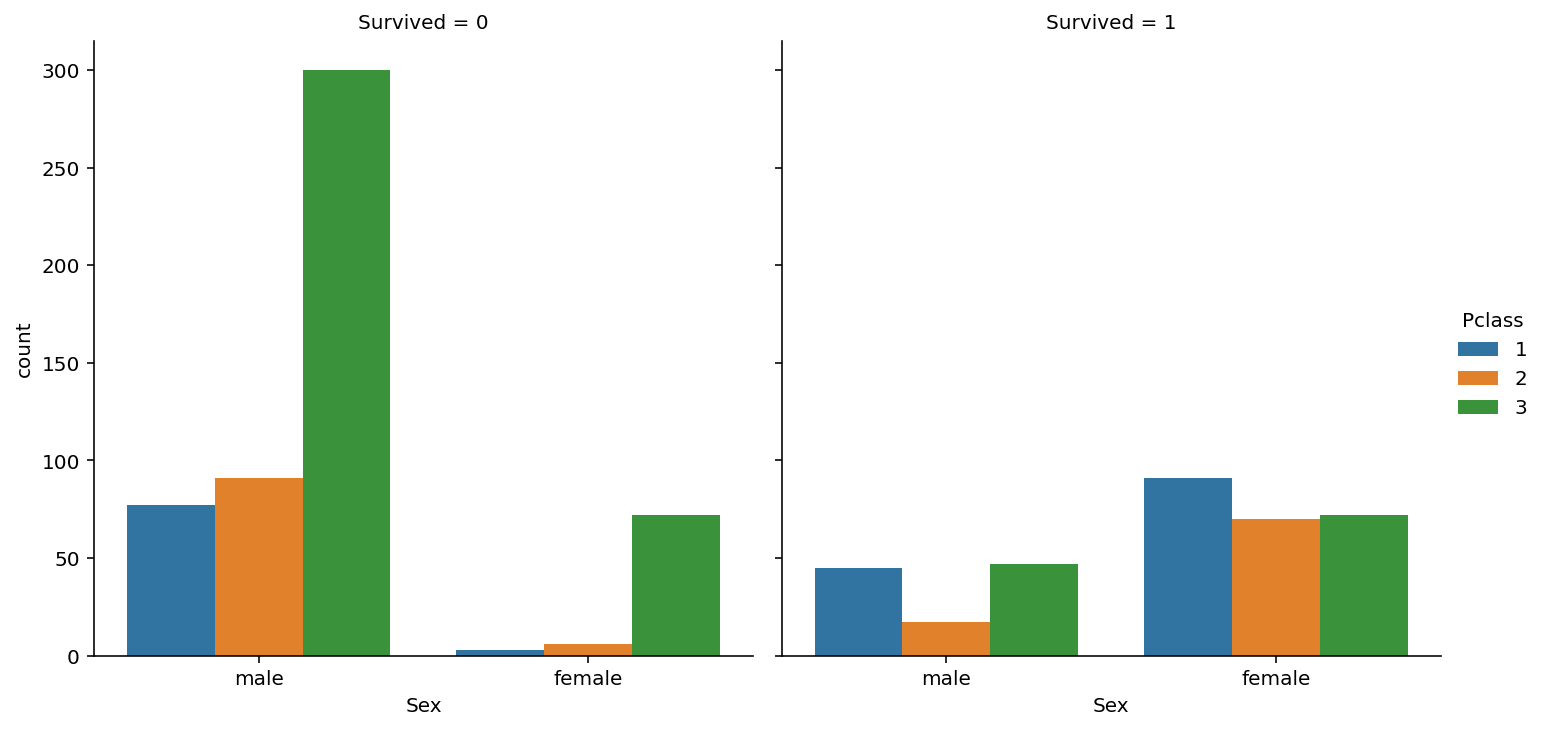

In [29]:
sns.catplot(x="Sex", hue="Pclass", col="Survived", kind="count", data=titanic_dataset);

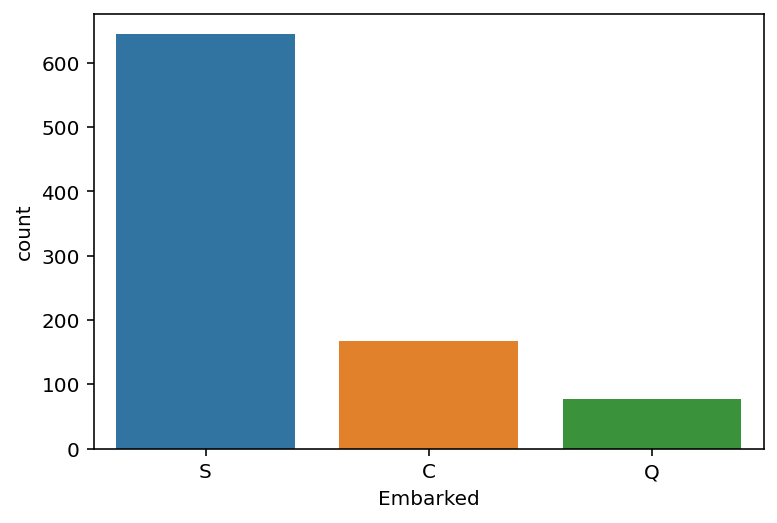

In [30]:
ax = sns.countplot(x="Embarked", data=titanic_dataset)


## Embarked Rate

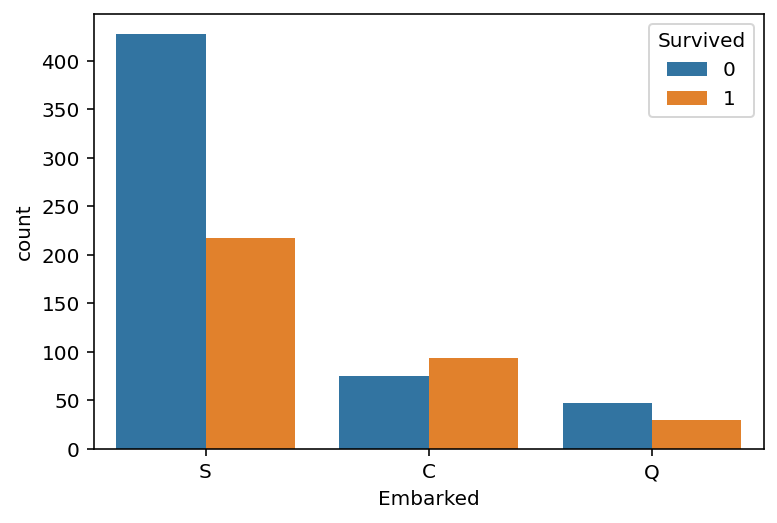

In [31]:
ax = sns.countplot(x="Embarked", hue="Survived", data=titanic_dataset)